<a href="https://colab.research.google.com/github/polyake/bigdata_hf_2022/blob/main/bigdata_gtd_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

# Fájl beolvasása:

In [2]:
#szűkített adathalmaz -- df_survived
df = pd.read_parquet('/content/drive/MyDrive/df_survived.parquet.gzip')

In [3]:
df

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,hostkidoutcome,hostkidoutcome_txt,nreleased,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,survived
2,197001220001,1970,1,22,0,222,Venezuela,3,South America,Caracas,...,2.0,Hostage(s) released by perpetrators,1.0,None,PGIS,0,0,0,0,1.000000
4,197003060001,1970,3,6,1,83,Guatemala,2,Central America & Caribbean,Guatemala,...,2.0,Hostage(s) released by perpetrators,1.0,None,PGIS,0,1,1,1,1.000000
5,197003110001,1970,3,11,1,30,Brazil,3,South America,Sao Paulo,...,2.0,Hostage(s) released by perpetrators,1.0,None,PGIS,0,1,1,1,1.000000
6,197003140001,1970,3,14,1,65,Ethiopia,11,Sub-Saharan Africa,Unknown,...,2.0,Hostage(s) released by perpetrators,5.0,None,PGIS,0,1,1,1,1.000000
8,197003240002,1970,3,24,1,58,Dominican Republic,2,Central America & Caribbean,National,...,2.0,Hostage(s) released by perpetrators,1.0,None,PGIS,0,1,1,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16557,201005190003,2010,5,19,1,41,Central African Republic,11,Sub-Saharan Africa,Haute-Kotto,...,7.0,Unknown,0.0,"National Counterterrorism Center, ""Two Civilia...",ISVG,1,1,0,1,0.000000
16558,201005240001,2010,5,24,0,160,Philippines,5,Southeast Asia,Davao Oriental,...,6.0,Combination,1.0,"National Counterterrorism Center, ""Three Soldi...",ISVG,0,0,0,0,0.333333
16559,201005270009,2010,5,27,1,104,Kenya,11,Sub-Saharan Africa,North Eastern,...,7.0,Unknown,0.0,"National Counterterrorism Center, ""Four Civili...",ISVG,1,1,0,1,0.000000
16564,201011290018,2010,11,29,1,153,Pakistan,6,South Asia,Federally Administered Tribal Areas,...,7.0,Unknown,4.0,"News, ""Pakistan: Militants Set Three Trucks on...",ISVG,-9,-9,0,-9,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8071 entries, 2 to 16568
Data columns (total 67 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   eventid             8071 non-null   int64  
 1   iyear               8071 non-null   int64  
 2   imonth              8071 non-null   int64  
 3   iday                8071 non-null   int64  
 4   extended            8071 non-null   int64  
 5   country             8071 non-null   int64  
 6   country_txt         8071 non-null   object 
 7   region              8071 non-null   int64  
 8   region_txt          8071 non-null   object 
 9   provstate           8071 non-null   object 
 10  city                8051 non-null   object 
 11  latitude            7808 non-null   float64
 12  longitude           7808 non-null   float64
 13  specificity         8071 non-null   float64
 14  vicinity            8071 non-null   int64  
 15  summary             6938 non-null   object 
 16  crit1

# Adathalmaz további feltárása, szűrése:

**fontos változók az EDA alapján:**

numerikus: iyear, extended, nperps, ndays (imonth, iday?)

(latitude, longtitude is erősebben korrelál a célváltozóval, de helyette a country, region stb.. változókat vesszük figyelembe)

kategorikus: country, region, targtype1, gname, weaptype1

In [5]:
df[df["extended"]==0]

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,hostkidoutcome,hostkidoutcome_txt,nreleased,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,survived
2,197001220001,1970,1,22,0,222,Venezuela,3,South America,Caracas,...,2.0,Hostage(s) released by perpetrators,1.0,None,PGIS,0,0,0,0,1.000000
10,197003290001,1970,3,29,0,11,Argentina,3,South America,Buenos Aires,...,5.0,Successful Rescue,1.0,None,PGIS,0,1,1,1,1.000000
33,197008190001,1970,8,19,0,218,Uruguay,3,South America,Montevideo,...,2.0,Hostage(s) released by perpetrators,1.0,None,PGIS,0,1,1,1,1.000000
43,197009120002,1970,9,12,0,603,United Kingdom,8,Western Europe,England,...,2.0,Hostage(s) released by perpetrators,3.0,None,PGIS,1,1,1,1,1.000000
59,197102210001,1971,2,21,0,222,Venezuela,3,South America,Caracas,...,2.0,Hostage(s) released by perpetrators,1.0,None,PGIS,0,0,0,0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16541,200808180011,2008,8,18,0,160,Philippines,5,Southeast Asia,Lanao del Norte,...,2.0,Hostage(s) released by perpetrators,63.0,"GMA News, ""Central Mindanao Towns Tense after ...",ISVG,0,0,0,0,1.000000
16544,200903180019,2009,3,18,0,92,India,6,South Asia,Assam,...,7.0,Unknown,0.0,"Jane's Intelligence, ""KLNLF Militants Kill Civ...",ISVG,0,0,0,0,0.000000
16545,200903300028,2009,3,30,0,153,Pakistan,6,South Asia,Punjab,...,6.0,Combination,400.0,"National Counterterrorism Center, ""11 Police O...",ISVG,0,0,0,0,1.000000
16548,200906230008,2009,6,23,0,92,India,6,South Asia,Orissa,...,3.0,Hostage(s) escaped (not during rescue attempt),1.0,"National Counterterrorism Center, ""Two Governm...",ISVG,0,0,0,0,1.000000


In [6]:
df[((df["extended"]==1)&(df['ndays']<0))]

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,hostkidoutcome,hostkidoutcome_txt,nreleased,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,survived
1787,198601100011,1987,1,20,1,110,Lebanon,10,Middle East & North Africa,Beirut,...,2.0,Hostage(s) released by perpetrators,1.0,"""Waite expresses hope hostage crisis almost ov...",UMD Encyclopedia of World Terrorism 2012,0,1,1,1,1.00
3932,199802040002,1998,2,4,1,42,Chad,11,Sub-Saharan Africa,Moyen-Chari,...,2.0,Hostage(s) released by perpetrators,4.0,"“Four French Nationals Kidnapped in Chad,” Age...",CETIS,0,1,1,1,1.00
3933,199802150018,1998,2,15,1,177,Sierra Leone,11,Sub-Saharan Africa,Western,...,2.0,Hostage(s) released by perpetrators,5.0,"“Italian Friar, Four Others Kidnapped in Sierr...",CETIS,-9,-9,0,-9,1.00
3934,199802200003,1998,2,20,1,74,Georgia,7,Central Asia,Samegrelo-Zemo Svaneti,...,2.0,Hostage(s) released by perpetrators,10.0,"“Terrorists release all hostages in Georgia,” ...",CETIS,0,1,1,1,1.00
3944,199806000000,1998,6,0,1,45,Colombia,3,South America,Unknown,...,6.0,Combination,1.0,"Edward F. Mickolus, Terrorism, 1996-2001: A Ch...",CETIS,0,1,1,1,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16555,201002190001,2010,2,19,1,41,Central African Republic,11,Sub-Saharan Africa,Mbomou,...,2.0,Hostage(s) released by perpetrators,2.0,"Jane’s Intelligence, “LRA Militants Attack Cit...",ISVG,1,1,0,1,0.05
16557,201005190003,2010,5,19,1,41,Central African Republic,11,Sub-Saharan Africa,Haute-Kotto,...,7.0,Unknown,0.0,"National Counterterrorism Center, ""Two Civilia...",ISVG,1,1,0,1,0.00
16559,201005270009,2010,5,27,1,104,Kenya,11,Sub-Saharan Africa,North Eastern,...,7.0,Unknown,0.0,"National Counterterrorism Center, ""Four Civili...",ISVG,1,1,0,1,0.00
16564,201011290018,2010,11,29,1,153,Pakistan,6,South Asia,Federally Administered Tribal Areas,...,7.0,Unknown,4.0,"News, ""Pakistan: Militants Set Three Trucks on...",ISVG,-9,-9,0,-9,1.00


sok olyan eset van, ahol az ndays nem mond semmit, mivel nem tartott 1 napnál tovább a támadás, illetve az extended=1 esetben is számottevő azon esetek száma, ahol nem ismert az ndays értéke --> kihagyjuk a magyarázó változók közül

In [7]:
df.groupby(by=df["nperps"]).count()["eventid"]

nperps
-99.0      5055
 0.0          7
 1.0         90
 2.0        165
 3.0        211
 4.0        246
 5.0        178
 6.0        121
 7.0         60
 8.0         55
 9.0         23
 10.0        94
 11.0        15
 12.0        42
 13.0         4
 14.0         6
 15.0        74
 16.0         2
 17.0         2
 19.0         2
 20.0        85
 21.0         3
 22.0         2
 23.0         1
 24.0        13
 25.0        23
 26.0         1
 30.0        84
 35.0         2
 36.0         5
 40.0        28
 41.0         1
 50.0        46
 51.0         1
 60.0        11
 70.0         4
 80.0         5
 100.0       38
 101.0        3
 130.0        2
 140.0        1
 150.0        5
 156.0        1
 200.0       19
 250.0        1
 300.0        8
 400.0        3
 600.0        1
 700.0        4
 1000.0       1
Name: eventid, dtype: int64

nperps változóból szintén az esetek több, mint felében nem ismert valójában az érték (-99) --> kihagyjuk a magyarázó változók közül

## Modellezéshez használt adathalmaz(ok) kialakítása:

2 adathalmaz (magyarázó változók halmaza):


*   EDA alapján fontosnak tűnő változók, az előbbiekben elvégzett szűréssel (nperps, ndays kihagyása) --> továbbiakban "**szűkített adathalmaz**"
*   összes olyan változó, amely kevés (legfeljebb 10-20) hiányzó értéket tartalmaz --- hiányzó értéknek számítanak azok is, amik nem NaN értékek, de a jelentésük valójában az, hogy nem ismert az adott információ (pl.: -99-es érték) --> továbbiakban "**bővített adathalmaz**"



In [8]:
cols_to_model = ['iyear', 'extended', 'country', 'region', 'targtype1', 'gname', 'weaptype1', 'survived']
df_model = df[cols_to_model]

In [9]:
cols_to_model_extended = ['iyear', 'imonth', 'iday', 'extended', 'country', 'region', 'provstate', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'multiple', 'suicide', 'attacktype1', 'targtype1', 'target1', 'natlty1', 'gname', 'individual', 'weaptype1', 'INT_MISC', 'survived']
df_model_extended = df[cols_to_model_extended]

In [10]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8071 entries, 2 to 16568
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   iyear      8071 non-null   int64  
 1   extended   8071 non-null   int64  
 2   country    8071 non-null   int64  
 3   region     8071 non-null   int64  
 4   targtype1  8071 non-null   int64  
 5   gname      8071 non-null   object 
 6   weaptype1  8071 non-null   int64  
 7   survived   8071 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 567.5+ KB


In [11]:
## szöveges változó kódolása
df_model['gname'] = pd.factorize(df_model['gname'])[0]

<ipython-input-11-305e3422c979>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['gname'] = pd.factorize(df_model['gname'])[0]


In [12]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8071 entries, 2 to 16568
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   iyear      8071 non-null   int64  
 1   extended   8071 non-null   int64  
 2   country    8071 non-null   int64  
 3   region     8071 non-null   int64  
 4   targtype1  8071 non-null   int64  
 5   gname      8071 non-null   int64  
 6   weaptype1  8071 non-null   int64  
 7   survived   8071 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 567.5 KB


In [13]:
df_model_extended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8071 entries, 2 to 16568
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iyear        8071 non-null   int64  
 1   imonth       8071 non-null   int64  
 2   iday         8071 non-null   int64  
 3   extended     8071 non-null   int64  
 4   country      8071 non-null   int64  
 5   region       8071 non-null   int64  
 6   provstate    8071 non-null   object 
 7   specificity  8071 non-null   float64
 8   vicinity     8071 non-null   int64  
 9   crit1        8071 non-null   int64  
 10  crit2        8071 non-null   int64  
 11  crit3        8071 non-null   int64  
 12  multiple     8070 non-null   float64
 13  suicide      8071 non-null   int64  
 14  attacktype1  8071 non-null   int64  
 15  targtype1    8071 non-null   int64  
 16  target1      8055 non-null   object 
 17  natlty1      8052 non-null   float64
 18  gname        8071 non-null   object 
 19  indiv

In [14]:
## hiányzó értékeket tartalmazó sorok elhagyása
df_model_extended=df_model_extended.dropna(axis=0)
df_model_extended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8035 entries, 2 to 16568
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iyear        8035 non-null   int64  
 1   imonth       8035 non-null   int64  
 2   iday         8035 non-null   int64  
 3   extended     8035 non-null   int64  
 4   country      8035 non-null   int64  
 5   region       8035 non-null   int64  
 6   provstate    8035 non-null   object 
 7   specificity  8035 non-null   float64
 8   vicinity     8035 non-null   int64  
 9   crit1        8035 non-null   int64  
 10  crit2        8035 non-null   int64  
 11  crit3        8035 non-null   int64  
 12  multiple     8035 non-null   float64
 13  suicide      8035 non-null   int64  
 14  attacktype1  8035 non-null   int64  
 15  targtype1    8035 non-null   int64  
 16  target1      8035 non-null   object 
 17  natlty1      8035 non-null   float64
 18  gname        8035 non-null   object 
 19  indiv

In [15]:
## szöveges változók kódolása
df_model_extended['provstate'], label_provstate = pd.factorize(df_model_extended['provstate'])
df_model_extended['gname'], label_gname = pd.factorize(df_model_extended['gname'])
df_model_extended['target1'], label_target1 = pd.factorize(df_model_extended['target1'])

In [16]:
df_model_extended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8035 entries, 2 to 16568
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iyear        8035 non-null   int64  
 1   imonth       8035 non-null   int64  
 2   iday         8035 non-null   int64  
 3   extended     8035 non-null   int64  
 4   country      8035 non-null   int64  
 5   region       8035 non-null   int64  
 6   provstate    8035 non-null   int64  
 7   specificity  8035 non-null   float64
 8   vicinity     8035 non-null   int64  
 9   crit1        8035 non-null   int64  
 10  crit2        8035 non-null   int64  
 11  crit3        8035 non-null   int64  
 12  multiple     8035 non-null   float64
 13  suicide      8035 non-null   int64  
 14  attacktype1  8035 non-null   int64  
 15  targtype1    8035 non-null   int64  
 16  target1      8035 non-null   int64  
 17  natlty1      8035 non-null   float64
 18  gname        8035 non-null   int64  
 19  indiv

Text(0, 0.5, 'db')

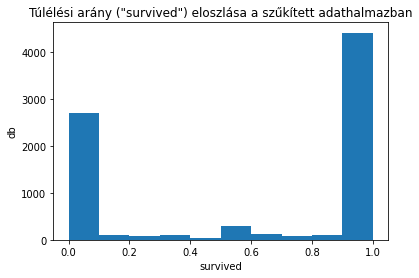

In [18]:
## túlélési arány a szűkített adathalmazban (kicsit több esetet tartalmaz, mint a bővített)
plt.hist(df_model["survived"])
plt.title("Túlélési arány (\"survived\") eloszlása a szűkített adathalmazban")
plt.xlabel("survived")
plt.ylabel("db")

Text(0, 0.5, 'db')

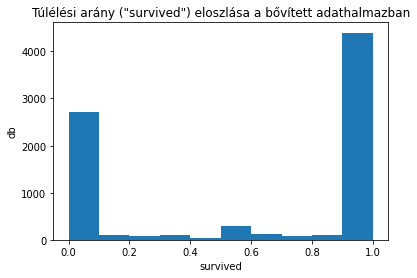

In [20]:
## túlélési arány a bővített adathalmazban (kicsit kevesebb esetet tartalmaz, mint a szűkített, itt ugyanis néhány eset a hiányzó értékek miatt eldobásra került)
plt.hist(df_model_extended["survived"])
plt.title("Túlélési arány (\"survived\") eloszlása a bővített adathalmazban")
plt.xlabel("survived")
plt.ylabel("db")

túlélési arány ("survived") alapján a következő értelmes osztályok lehetnek: 

*   0.5-nél elvágva az adathalmazt
*   mindenki megmenekült (=1) vs van aki nem (!=1)





In [21]:
## célváltozók kialakítása
df_model['class1'] = np.where(df_model['survived']==1, 1, 0)
df_model['class2'] = np.where(df_model['survived']>0.5, 1, 0)

<ipython-input-21-254c1fd063aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['class1'] = np.where(df_model['survived']==1, 1, 0)
<ipython-input-21-254c1fd063aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['class2'] = np.where(df_model['survived']>0.5, 1, 0)


In [22]:
## célváltozók kialakítása
df_model_extended['class1'] = np.where(df_model_extended['survived']==1, 1, 0)
df_model_extended['class2'] = np.where(df_model_extended['survived']>0.5, 1, 0)

Mindkét osztályozással elvégeztük a modellezést, nagyon hasonló teljesítményt lehetett elérni mindkét verziónál. A továbbiakban a 0.5-nél való vágás szerinti osztályozás részletei és eredményei láthatók.

# Modellezés Spark-ban:

In [23]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 43 kB/s 
     |████████████████████████████████| 199 kB 60.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=ed7efdd87f7e3cd57f347397df84fe799eb0f71e16d2694b1426555d76bd8470
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [24]:
import pyspark
import pyarrow
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
import pyspark.ml.evaluation as evals
import pyspark.ml.tuning as tune
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier

In [25]:
## spark session létrehozása
spark = SparkSession.builder.getOrCreate()
spark

In [26]:
## spark dataframe-ek létrehozása a pandas dataframe-ekből

new_df = spark.createDataFrame(df_model)

new_df_ext = spark.createDataFrame(df_model_extended)

In [27]:
## magyarázó változók halmazainak létrehozása

feature_cols=new_df.columns
feature_cols = [e for e in feature_cols if e not in ("survived","class1", "class2")]

feature_cols_ext=new_df_ext.columns
feature_cols_ext = [e for e in feature_cols_ext if e not in ("survived","class1", "class2")]

In [28]:
## magyarázó változók "vektorosítása" -- vector assembler
## egyéb transzformációra nem volt már itt szükség, ugyanis a szöveges változók kódolása már korábban megtörtént

## szűkített halmazon
vec_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
credit_pipe = Pipeline(stages=[vec_assembler])
piped_data = credit_pipe.fit(new_df).transform(new_df)

## bővített halmazon
vec_assembler_ext = VectorAssembler(inputCols=feature_cols_ext, outputCol="features_ext")
credit_pipe_ext = Pipeline(stages=[vec_assembler_ext])
piped_data_ext = credit_pipe_ext.fit(new_df_ext).transform(new_df_ext)

In [29]:
## tanító és teszt halmazok kialakítása 70/30 arányban történő felosztással

training, test = piped_data.randomSplit([.7, .3])

training_ext, test_ext = piped_data_ext.randomSplit([.7, .3])

### Döntési fa modell:

In [30]:
## döntési fa modell építése 5-szörös keresztvalidációval, AUC alapján történő kiértékeléssel
## hiperparamétereket az alapbeállításokkal használjuk itt, ezért "üres" a grid search buildere

## szűkített magyarázó változó halmazon
tree = DecisionTreeClassifier(featuresCol='features', labelCol='class2')
evaluator = BinaryClassificationEvaluator(labelCol='class2')
grid3=tune.ParamGridBuilder()
grid3=grid3.build()
cv3= tune.CrossValidator(estimator=tree, estimatorParamMaps=grid3, evaluator=evaluator, numFolds=5)

## bővített magyarázó változó halmazon
tree_ext = DecisionTreeClassifier(featuresCol='features_ext', labelCol='class2')
evaluator_ext = BinaryClassificationEvaluator(labelCol='class2')
grid3_ext=tune.ParamGridBuilder()
grid3_ext=grid3_ext.build()
cv3_ext= tune.CrossValidator(estimator=tree_ext, estimatorParamMaps=grid3_ext, evaluator=evaluator_ext, numFolds=5)

In [31]:
## tanítás

%%time
pipelineCV = Pipeline(stages=[cv3])
models3 = pipelineCV.fit(training)
best_tree = models3.stages[-1].bestModel

CPU times: user 412 ms, sys: 53.5 ms, total: 466 ms
Wall time: 28.9 s


In [32]:
## kiértékelés a teszt halmazon

test_results3=best_tree.transform(test)
print("AUC a teszt halmazon (szűkített magyarázó változó halmazzal): "+str(evaluator.evaluate(test_results3)))

AUC a teszt halmazon (szűkített magyarázó változó halmazzal): 0.6297246309781026


In [33]:
## tanítás

%%time
pipelineCV_ext = Pipeline(stages=[cv3_ext])
models3_ext = pipelineCV_ext.fit(training_ext)
best_tree_ext = models3_ext.stages[-1].bestModel

CPU times: user 309 ms, sys: 60.7 ms, total: 370 ms
Wall time: 16.8 s


In [34]:
## kiértékelés a teszt halmazon

test_results3_ext=best_tree_ext.transform(test_ext)
print("AUC a teszt halmazon (bővített magyarázó változó halmazzal): "+str(evaluator_ext.evaluate(test_results3_ext)))

AUC a teszt halmazon (bővített magyarázó változó halmazzal): 0.6861388098478286


A kapott döntési fa (szűkített halmazzal):

In [35]:
display(best_tree)
print(best_tree.toDebugString)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_ccda13118810, depth=5, numNodes=41, numClasses=2, numFeatures=7

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_ccda13118810, depth=5, numNodes=41, numClasses=2, numFeatures=7
  If (feature 0 <= 1999.5)
   If (feature 2 <= 9.5)
    If (feature 0 <= 1995.5)
     If (feature 4 <= 3.5)
      If (feature 4 <= 1.5)
       Predict: 1.0
      Else (feature 4 > 1.5)
       Predict: 0.0
     Else (feature 4 > 3.5)
      If (feature 2 <= 7.0)
       Predict: 1.0
      Else (feature 2 > 7.0)
       Predict: 0.0
    Else (feature 0 > 1995.5)
     Predict: 0.0
   Else (feature 2 > 9.5)
    If (feature 0 <= 1995.5)
     If (feature 3 <= 11.5)
      If (feature 5 <= 230.5)
       Predict: 1.0
      Else (feature 5 > 230.5)
       Predict: 0.0
     Else (feature 3 > 11.5)
      Predict: 0.0
    Else (feature 0 > 1995.5)
     Predict: 1.0
  Else (feature 0 > 1999.5)
   If (feature 4 <= 13.5)
    If (feature 4 <= 5.0)
     If (feature 4 <= 2.5)
      Predict: 1.0
     Else (feature 4 > 2.5)
      If (feature 3 <= 5.5)
       Predict: 1.0
      Else (feat

In [36]:
## összes változó
feature_cols

['iyear', 'extended', 'country', 'region', 'targtype1', 'gname', 'weaptype1']

Fontos változók:

In [37]:
## fontosság
best_tree.featureImportances

SparseVector(7, {0: 0.4216, 1: 0.0563, 2: 0.0278, 3: 0.0824, 4: 0.3656, 5: 0.0464})

legfontosabb változók: iyear, targtype1 --> tehát az elkövetés éve és a célpont típusa

A kapott döntési fa (bővített halmazon):

In [38]:
display(best_tree_ext)
print(best_tree_ext.toDebugString)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_f5c16e8e9b2b, depth=5, numNodes=41, numClasses=2, numFeatures=22

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_f5c16e8e9b2b, depth=5, numNodes=41, numClasses=2, numFeatures=22
  If (feature 0 <= 1999.5)
   If (feature 16 <= 1072.5)
    If (feature 17 <= 9.5)
     If (feature 20 <= 5.5)
      Predict: 0.0
     Else (feature 20 > 5.5)
      Predict: 1.0
    Else (feature 17 > 9.5)
     Predict: 1.0
   Else (feature 16 > 1072.5)
    If (feature 4 <= 93.5)
     If (feature 1 <= 6.5)
      If (feature 6 <= 45.5)
       Predict: 1.0
      Else (feature 6 > 45.5)
       Predict: 0.0
     Else (feature 1 > 6.5)
      If (feature 4 <= 7.0)
       Predict: 0.0
      Else (feature 4 > 7.0)
       Predict: 1.0
    Else (feature 4 > 93.5)
     If (feature 2 <= 6.5)
      If (feature 6 <= 203.5)
       Predict: 1.0
      Else (feature 6 > 203.5)
       Predict: 0.0
     Else (feature 2 > 6.5)
      Predict: 1.0
  Else (feature 0 > 1999.5)
   If (feature 15 <= 13.5)
    If (feature 15 <= 5.0)
     If (feature 15 <= 2.5)
      Predict: 1.0
     Else (

In [39]:
## összes változó
feature_cols_ext

['iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'region',
 'provstate',
 'specificity',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'multiple',
 'suicide',
 'attacktype1',
 'targtype1',
 'target1',
 'natlty1',
 'gname',
 'individual',
 'weaptype1',
 'INT_MISC']

Fontos változók:

In [40]:
## fontosság
best_tree_ext.featureImportances

SparseVector(22, {0: 0.3702, 1: 0.0047, 2: 0.0038, 3: 0.0635, 4: 0.0136, 5: 0.0425, 6: 0.0131, 14: 0.0594, 15: 0.3539, 16: 0.0426, 17: 0.0264, 20: 0.0063})

legfontosabb változók: iyear, targtype1 --> tehát akárcsak az szűkített halmaz esetében, az elkövetés éve és a célpont típusa

### Gradient boosted tree modell:

In [41]:
## GBT modell építése 5-szörös keresztvalidációval, AUC alapján történő kiértékeléssel
## hiperparamétereket az alapbeállításokkal használjuk itt, ezért "üres" a grid search buildere

## szűkített halmazzal
gbt = GBTClassifier(featuresCol='features', labelCol='class2')
evaluator = BinaryClassificationEvaluator(labelCol='class2')
grid2=tune.ParamGridBuilder()
grid2=grid2.build()
cv2= tune.CrossValidator(estimator=gbt, estimatorParamMaps=grid2, evaluator=evaluator, numFolds=5)

## bővített halmazzal
gbt_ext = GBTClassifier(featuresCol='features_ext', labelCol='class2')
evaluator_ext = BinaryClassificationEvaluator(labelCol='class2')
grid2_ext=tune.ParamGridBuilder()
grid2_ext=grid2_ext.build()
cv2_ext= tune.CrossValidator(estimator=gbt_ext, estimatorParamMaps=grid2_ext, evaluator=evaluator_ext, numFolds=5)

In [42]:
## tanítás (szűkített halmazzal)

%%time
models2=cv2.fit(training)
best_gbt=models2.bestModel

CPU times: user 774 ms, sys: 144 ms, total: 918 ms
Wall time: 1min 15s


In [43]:
## tanítás (bővített halmazzal)

%%time
models2_ext=cv2_ext.fit(training_ext)
best_gbt_ext=models2_ext.bestModel

CPU times: user 633 ms, sys: 137 ms, total: 769 ms
Wall time: 53 s


In [44]:
## kiértékelés a teszt halmazokon

test_results2=best_gbt.transform(test)

test_results2_ext=best_gbt_ext.transform(test_ext)

In [46]:
print("AUC a teszt halmazon (szűkített halmazzal): "+str(evaluator.evaluate(test_results2)))

AUC a teszt halmazon (szűkített halmazzal): 0.8090340075863712


In [47]:
print("AUC a teszt halmazon (bővített halmazzal): "+str(evaluator_ext.evaluate(test_results2_ext)))

AUC a teszt halmazon (bővített halmazzal): 0.804376380763861


Fontos változók (szűkített halmazzal):

In [48]:
## változók
feature_cols

['iyear', 'extended', 'country', 'region', 'targtype1', 'gname', 'weaptype1']

In [49]:
## fontosság
best_gbt.featureImportances

SparseVector(7, {0: 0.1837, 1: 0.0433, 2: 0.1896, 3: 0.1078, 4: 0.1892, 5: 0.1541, 6: 0.1324})

fontos változók rendre: iyear, extended, country, region, targtype2, gname, weaptype1

változók jelentése: elkövetés éve, 24 óránál hosszabb ideig tartott-e a támadás, melyik országban történt az eset, melyik régióban történt az eset, célpont típusa, elkövető szervezet neve, elsődleges fegyvertípus

Fontos változók (bővített halmazzal):

In [50]:
## összes változó
feature_cols_ext

['iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'region',
 'provstate',
 'specificity',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'multiple',
 'suicide',
 'attacktype1',
 'targtype1',
 'target1',
 'natlty1',
 'gname',
 'individual',
 'weaptype1',
 'INT_MISC']

In [51]:
## fontosság
best_gbt_ext.featureImportances

SparseVector(22, {0: 0.1067, 1: 0.0311, 2: 0.0354, 3: 0.0336, 4: 0.0989, 5: 0.0732, 6: 0.1107, 7: 0.0104, 8: 0.0058, 9: 0.0018, 10: 0.0005, 11: 0.0041, 12: 0.0072, 13: 0.0028, 14: 0.0344, 15: 0.1153, 16: 0.0592, 17: 0.0802, 18: 0.0863, 19: 0.0004, 20: 0.0771, 21: 0.0251})

legfontosabb változók: iyear, provstate, targtype1 --> tehát az elkövetés éve, az elkövetés helyszíne (olyan szinten meghatározva, mint például, hogy melyik államban történt), célpont típusa

# Modellezés sklearn-nel, fontos változók bővebb feltárása:

In [52]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 7.8 MB/s 


In [53]:
import graphviz
from sklearn import tree
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
import shap

In [54]:
## magyarázó változók halmazainak kialakítása

features=df_model.loc[:, ~df_model.columns.isin(['survived', 'class1', 'class2'])]

features_ext=df_model_extended.loc[:, ~df_model_extended.columns.isin(['survived', 'class1', 'class2'])]

In [55]:
## tanító és teszt halmazok létrehozása 70/30 arányban történő felosztással

X_train, X_test, Y_train, Y_test = train_test_split(features, df_model["class2"], test_size=0.3, random_state=42)

X_train_ext, X_test_ext, Y_train_ext, Y_test_ext = train_test_split(features_ext, df_model_extended["class2"], test_size=0.3, random_state=42)

## Döntési fa modell:

In [56]:
## döntési fa modellek építése, 10-szeres keresztvalidációval
## grid search alkalmazása a következő hiperparamétereknél: max_depth, min_samples_leaf
## maximális mélység maximumát 5-re állítjuk, hogy a fa ábrázolása értelmesen lehetséges legyen
## alapértelmezetten az estimator scoring-ja alapján történik a legjobb modell kiválasztása -- ebben az esetben ez az accuracy

parameters = {'max_depth':range(1,6), 'random_state':[42], 'min_samples_leaf':range(1,10)}

## szűkített halmazzal
dt=DecisionTreeClassifier()
dt_gs = GridSearchCV(dt, parameters, cv=10)
dt_gs.fit(X_train,Y_train)

## bővített halmazzal
dt_ext=DecisionTreeClassifier()
dt_gs_ext = GridSearchCV(dt_ext, parameters, cv=10)
dt_gs_ext.fit(X_train_ext,Y_train_ext)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 6),
                         'min_samples_leaf': range(1, 10),
                         'random_state': [42]})

In [57]:
## legjobb modell kiválasztása

## szűkített halmazzal
best_tree=dt_gs.best_estimator_

## bővített halmazzal
best_tree_ext=dt_gs_ext.best_estimator_

In [58]:
## legjobb modell a szűkített halmazzal
best_tree

DecisionTreeClassifier(max_depth=5, min_samples_leaf=9, random_state=42)

In [59]:
## legjobb modell a bővített halmazzal
best_tree_ext

DecisionTreeClassifier(max_depth=5, random_state=42)

In [60]:
## kiértékelés a teszt halmazon accuracy és AUC alapján

## szűkített halmazzal
prob=best_tree.predict_proba(X_test)
pred=best_tree.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(Y_test, prob[:,1], pos_label=1, sample_weight=None)
auc=metrics.auc(fpr,tpr)
accuracy=metrics.accuracy_score(Y_test, pred)

## bővített halmazzal
prob_ext=best_tree_ext.predict_proba(X_test_ext)
pred_ext=best_tree_ext.predict(X_test_ext)
fpr_ext,tpr_ext,thresholds_ext = metrics.roc_curve(Y_test_ext, prob_ext[:,1], pos_label=1, sample_weight=None)
auc_ext=metrics.auc(fpr_ext,tpr_ext)
accuracy_ext=metrics.accuracy_score(Y_test_ext, pred_ext)

In [61]:
print("AUC a teszt halmazon (szűkített halmazzal): "+str(auc)+"\n Accuracy a teszt halmazon (szűkített halmazzal): "+ str(accuracy))

AUC a teszt halmazon (szűkített halmazzal): 0.7679181629046967
 Accuracy a teszt halmazon (szűkített halmazzal): 0.6994219653179191


In [62]:
print("AUC a teszt halmazon (bővített halmazzal): "+str(auc_ext)+"\n Accuracy a teszt halmazon (bővített halmazzal): "+ str(accuracy_ext))

AUC a teszt halmazon (bővített halmazzal): 0.7650898877199436
 Accuracy a teszt halmazon (bővített halmazzal): 0.7109083367897138


### A szűkített magyarázó változó halmazzal épített modell értelmezése:

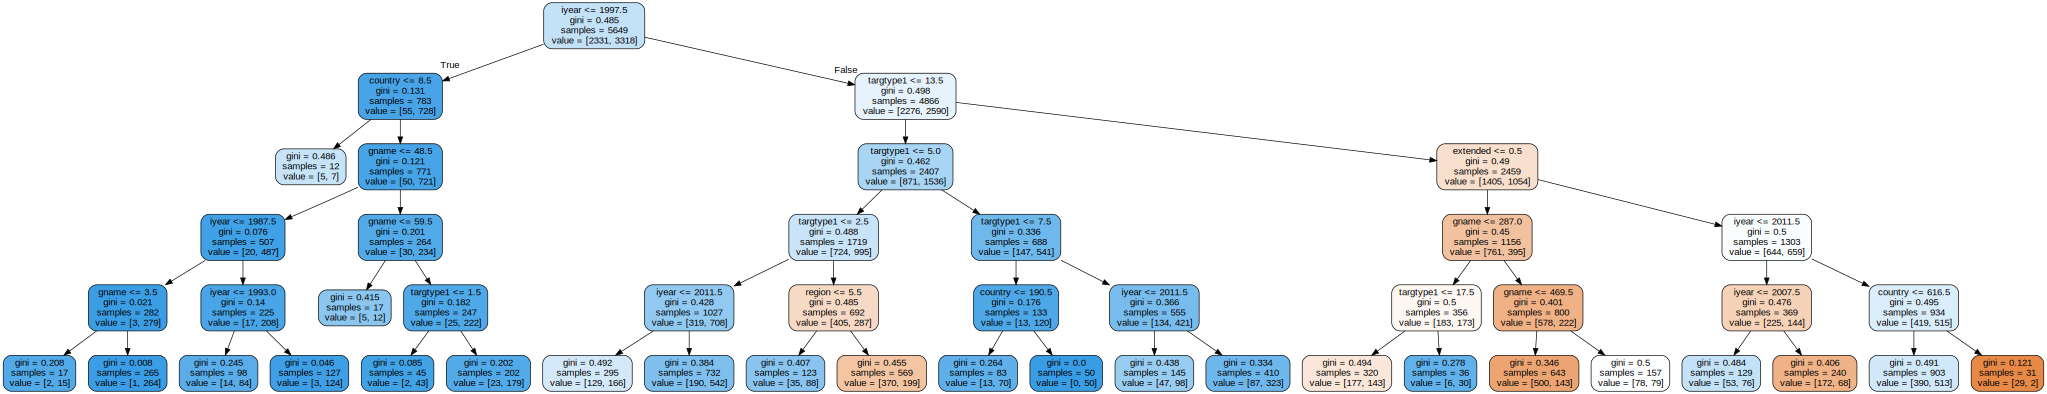

In [66]:
## döntési fa modell ábrázolása
tree_viz=graphviz.Source(tree.export_graphviz(best_tree, filled=True, rounded=True,feature_names=list(features.columns)))
tree_viz

In [67]:
## fontos változók megállapítása a döntési fa saját fontossági értékei alapján
feature_importance_dt = pd.DataFrame(
    {'feature': list(features.columns),
     'importance': best_tree.feature_importances_
    })

In [68]:
feature_importance_dt.sort_values(by=['importance'], ascending=False)

,feature,importance
0,iyear,0.427022
4,targtype1,0.369402
5,gname,0.073282
1,extended,0.053917
3,region,0.044235
2,country,0.032142
6,weaptype1,0.000000


legfontosabb változónak ez alapján az iyear (év) és a targtype1 (célpont típusa) bizonyul

In [69]:
## fontos változók megállapítása a permutation feature importance értékek alapján

r1 = permutation_importance(best_tree, X_test, Y_test, n_repeats=30, random_state=42)

for i in r1.importances_mean.argsort()[::-1]:
    if r1.importances_mean[i] > 0.01:
        print(X_test.columns[i],
        f"{r1.importances_mean[i]:.3f}"
        f" +/- {r1.importances_std[i]:.3f}")

targtype1 0.068 +/- 0.008
extended 0.040 +/- 0.005
iyear 0.038 +/- 0.006
region 0.012 +/- 0.003


legfontosabb változónak a permutation importance alapján a targtype1 (célpont típusa), extended (24 óránál tovább tartott-e), iyear (év), region (régió) bizonyul

### A bővített magyarázó változó halmazzal épített modell értelmezése:

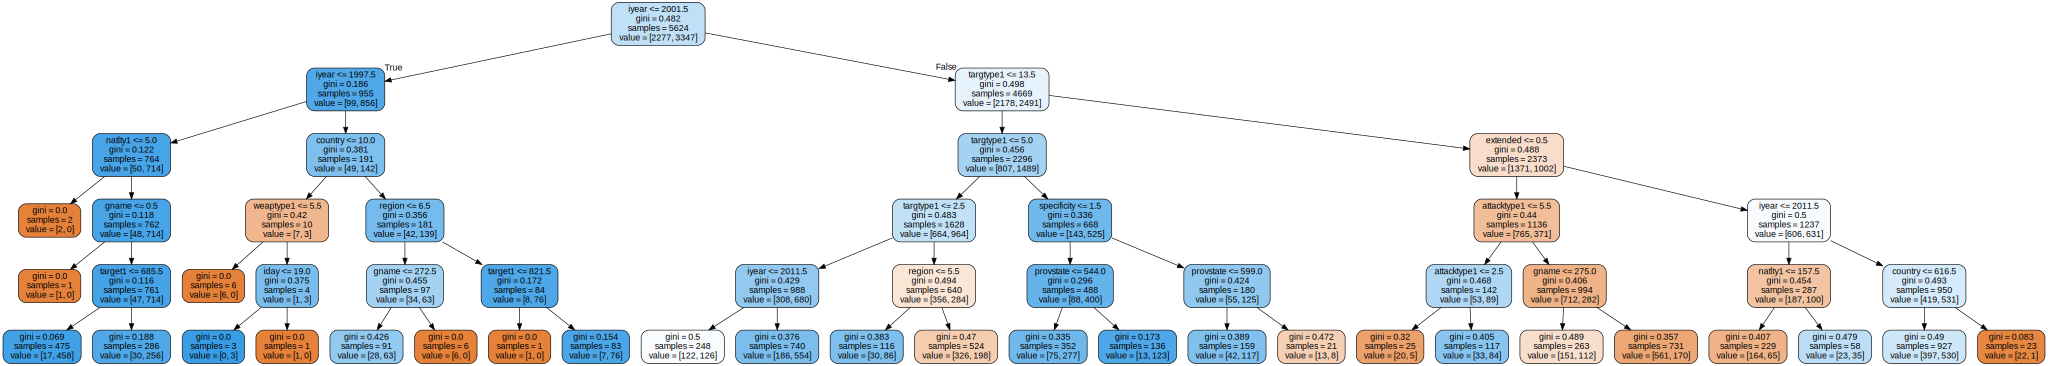

In [70]:
## döntési fa modell ábrázolása

tree_viz_ext=graphviz.Source(tree.export_graphviz(best_tree_ext, filled=True, rounded=True,feature_names=list(features_ext.columns)))
tree_viz_ext

In [71]:
## fontos változók megállapítása a döntési fa saját fontossági értékei alapján

feature_importance_dt_ext = pd.DataFrame(
    {'feature': list(features_ext.columns),
     'importance': best_tree_ext.feature_importances_
    })

In [72]:
feature_importance_dt_ext.sort_values(by=['importance'], ascending=False)

,feature,importance
0,iyear,0.405234
15,targtype1,0.312947
14,attacktype1,0.062584
3,extended,0.061949
5,region,0.048095
18,gname,0.033557
4,country,0.025899
17,natlty1,0.020123
6,provstate,0.011462
7,specificity,0.006405


legfontosabb változónak ez alapján az iyear (év) és targtype1 (célpont típusa) bizonyul

In [73]:
## fontos változók megállapítása a permutation feature importance értékek alapján

r1_ext = permutation_importance(best_tree_ext, X_test_ext, Y_test_ext, n_repeats=30, random_state=42)

for i in r1_ext.importances_mean.argsort()[::-1]:
    if r1_ext.importances_mean[i] > 0.01:
        print(X_test_ext.columns[i],
        f"{r1_ext.importances_mean[i]:.3f}"
        f" +/- {r1_ext.importances_std[i]:.3f}")

targtype1 0.076 +/- 0.008
iyear 0.047 +/- 0.006
extended 0.047 +/- 0.006
region 0.016 +/- 0.003
attacktype1 0.016 +/- 0.002
natlty1 0.014 +/- 0.004


legfontosabb változónak a permutation importance alapján a targtype1 (célpont típusa), extended (24 óránál tovább tartott-e), iyear (év) bizonyul

Összességében tehát elmondható, hogy bármely szempontot is tekintjük az elkövetés éve és a célpont típusa egyértelműen fontos változónak számít, ha azt akarjuk megjósolni, hogy egy támadást az emberek többsége túlél-e vagy sem. Ezen felül az elkövetés helyszínére vonatkozó információk is lényegesek lehetnek.

## Random Forest:

In [74]:
## véletlen erdő modellek építése, 5-szörös keresztvalidációval
## grid search alkalmazása a következő hiperparamétereknél: n_estimators, max_depth, min_samples_leaf
## alapértelmezetten az estimator scoring-ja alapján történik a legjobb modell kiválasztása -- ebben az esetben ez az accuracy

parameters2 = {'n_estimators':[5,10,15,20,50], 'max_depth':range(1,11), 'random_state':[42], 'min_samples_leaf':range(1,10)}

## szűkített halmazzal
rf=RandomForestClassifier()
rf_gs = GridSearchCV(rf, parameters2, cv=5)
rf_gs.fit(X_train,Y_train)

## bővített halmazzal
rf_ext=RandomForestClassifier()
rf_gs_ext = GridSearchCV(rf_ext, parameters2, cv=5)
rf_gs_ext.fit(X_train_ext,Y_train_ext)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 10),
                         'n_estimators': [5, 10, 15, 20, 50],
                         'random_state': [42]})

In [75]:
## legjobb modell a szűkített halmazzal
best_rf=rf_gs.best_estimator_
best_rf

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=50,
                       random_state=42)

In [76]:
## legjobb modell a bővített halmazzal
best_rf_ext=rf_gs_ext.best_estimator_
best_rf_ext

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=50,
                       random_state=42)

In [77]:
## kiértékelés a teszt halmazon accuracy és AUC alapján

## szűkített halmazzal
prob2=best_rf.predict_proba(X_test)
pred2=best_rf.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(Y_test, prob2[:,1], pos_label=1, sample_weight=None)
auc=metrics.auc(fpr,tpr)
accuracy=metrics.accuracy_score(Y_test, pred2)

## bővített halmazzal
prob2_ext=best_rf_ext.predict_proba(X_test_ext)
pred2_ext=best_rf_ext.predict(X_test_ext)
fpr_ext,tpr_ext,thresholds_ext = metrics.roc_curve(Y_test_ext, prob2_ext[:,1], pos_label=1, sample_weight=None)
auc_ext=metrics.auc(fpr_ext,tpr_ext)
accuracy_ext=metrics.accuracy_score(Y_test_ext, pred2_ext)

In [78]:
print("AUC a teszt halmazon (szűkített halmazzal): "+str(auc)+"\n Accuracy a teszt halmazon (szűkített halmazzal): "+ str(accuracy))

AUC a teszt halmazon (szűkített halmazzal): 0.8314370297537619
 Accuracy a teszt halmazon (szűkített halmazzal): 0.7563996696944674


In [79]:
print("AUC a teszt halmazon (bővített halmazzal): "+str(auc_ext)+"\n Accuracy a teszt halmazon (bővített halmazzal): "+ str(accuracy_ext))

AUC a teszt halmazon (bővített halmazzal): 0.8288132415471583
 Accuracy a teszt halmazon (bővített halmazzal): 0.7540439651596847


### A szűkített magyarázó változó halmazzal épített modell értelmezése:

In [80]:
## fontos változók megállapítása a véletlen erdő modell saját fontossági értékei alapján
feature_importance_rf = pd.DataFrame(
    {'feature': list(features.columns),
     'importance': best_rf.feature_importances_
    })

In [81]:
feature_importance_rf.sort_values(by=['importance'], ascending=False)

,feature,importance
0,iyear,0.233807
5,gname,0.201483
4,targtype1,0.196284
2,country,0.132971
3,region,0.095368
1,extended,0.078826
6,weaptype1,0.061261


legfontosabb változók ez alapján: iyear (év), gname (elkövető szervezet neve), targtype1 (célpont típusa), country (ország)

In [82]:
## fontos változók megállapítása a permutation feature importance értékek alapján

r2 = permutation_importance(best_rf, X_test, Y_test, n_repeats=30, random_state=42)

for i in r2.importances_mean.argsort()[::-1]:
    if r2.importances_mean[i] > 0.01:
        print(X_test.columns[i],
        f"{r2.importances_mean[i]:.3f}"
        f" +/- {r2.importances_std[i]:.3f}")

iyear 0.045 +/- 0.006
targtype1 0.044 +/- 0.005
gname 0.036 +/- 0.005
extended 0.026 +/- 0.005
region 0.022 +/- 0.005
country 0.020 +/- 0.004
weaptype1 0.010 +/- 0.004


legfontosabb változók a permutation importance score-ok alapján: iyear (év), targtype1 (célpont típusa), gname (elkövető szervezet neve), extended (24 óránál tovább tartott-e)

#### Fontos változók megállapítása a SHAP értékek alapján:

In [83]:
## SHAP értékek megállapítása a globális fontosságok ábrázolásához
explainer_rf = shap.Explainer(best_rf)
shap_values_rf = explainer_rf(X_test)

Text(0.5, 0, 'átlagos abszolút SHAP érték')

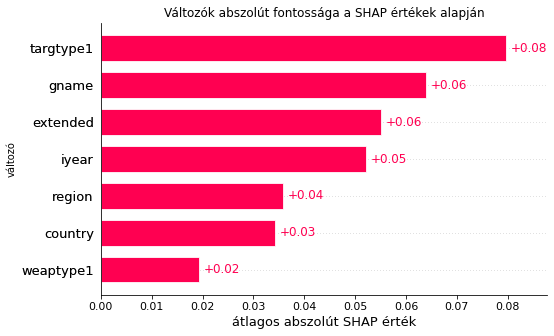

In [89]:
shap.plots.bar(shap_values_rf[:, :, 1], show=False)
plt.title("Változók abszolút fontossága a SHAP értékek alapján")
plt.ylabel("változó")
plt.xlabel("átlagos abszolút SHAP érték")

Text(0.5, 0, 'SHAP érték')

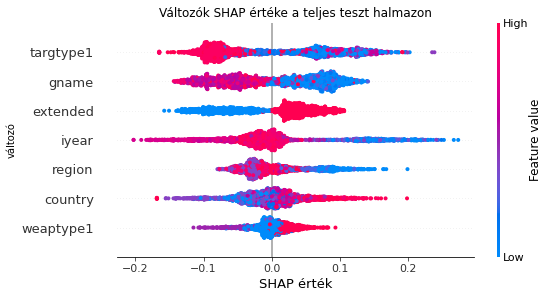

In [93]:
shap.plots.beeswarm(shap_values_rf[:, :, 1], show=False)
plt.title("Változók SHAP értéke a teljes teszt halmazon")
plt.ylabel("változó")
plt.xlabel("SHAP érték")

In [94]:
## SHAP értékek megállapítása a lokális fontosságok ábrázolásához
explainer_rf = shap.TreeExplainer(best_rf)
shap_values_rf = explainer_rf.shap_values(X_test)

Text(0.5, 1.4, 'A döntést befolyásoló tényezők egy "pozitívnak" prediktált esetben')

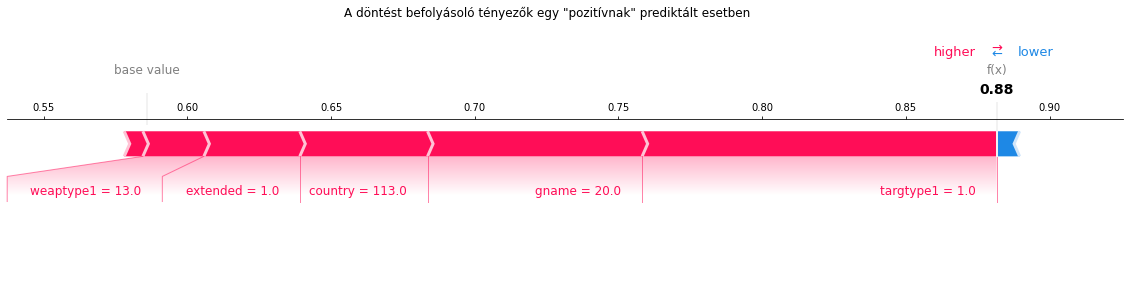

In [105]:
shap.force_plot(explainer_rf.expected_value[1], shap_values_rf[1][6], X_test.iloc[6], matplotlib=True, show=False)
plt.suptitle("A döntést befolyásoló tényezők egy \"pozitívnak\" prediktált esetben", y=1.4)

Text(0.5, 1.4, 'A döntést befolyásoló tényezők egy "negatívnak" prediktált esetben')

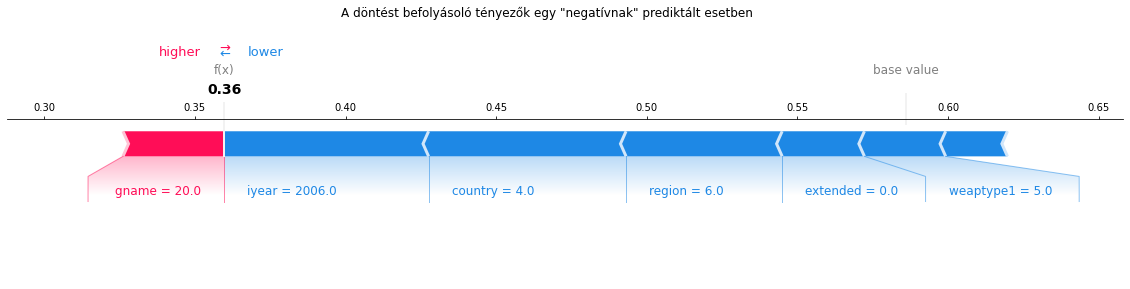

In [106]:
shap.force_plot(explainer_rf.expected_value[1], shap_values_rf[1][8], X_test.iloc[8], matplotlib=True, show=False)
plt.suptitle("A döntést befolyásoló tényezők egy \"negatívnak\" prediktált esetben", y=1.4)

### A bővített magyarázó változó halmazzal épített modell értelmezése:

In [107]:
## fontos változók megállapítása a véletlen erdő modell saját fontossági értékei alapján
feature_importance_rf_ext = pd.DataFrame(
    {'feature': list(features_ext.columns),
     'importance': best_rf_ext.feature_importances_
    })

In [108]:
feature_importance_rf_ext.sort_values(by=['importance'], ascending=False)

,feature,importance
0,iyear,0.118876
15,targtype1,0.110321
16,target1,0.109983
6,provstate,0.105141
18,gname,0.096982
3,extended,0.070040
17,natlty1,0.061775
5,region,0.059467
4,country,0.055868
2,iday,0.040832


legfontosabb változók ez alapján: iyear (év), targtype1 (célpont típusa), target (pontos célpont megnevezése), provstate (helyszín - állam)

In [109]:
## fontos változók megállapítása a permutation feature importance értékek alapján

r2_ext = permutation_importance(best_rf_ext, X_test_ext, Y_test_ext, n_repeats=30, random_state=42)

for i in r2_ext.importances_mean.argsort()[::-1]:
    if r2_ext.importances_mean[i] > 0.01:
        print(X_test_ext.columns[i],
        f"{r2_ext.importances_mean[i]:.3f}"
        f" +/- {r2_ext.importances_std[i]:.3f}")

extended 0.033 +/- 0.005
iyear 0.022 +/- 0.004
targtype1 0.021 +/- 0.004
gname 0.020 +/- 0.005
region 0.015 +/- 0.004
provstate 0.013 +/- 0.005
INT_MISC 0.011 +/- 0.002


legfontosabb változók a permutation importance score-ok alapján: extended (24 óránál tovább tartott-e), iyear (év), targtype1 (célpont típusa), gname (elkövető szervezet neve)

Összességében tehát az mondható, hogy ha azt szeretnénk megjósolni, hogy egy támadást az érintettek többsége túlél-e fontos információnak számít az elkövetés éve és a célpont típusa, valamint az is, hogy 24 óránál tovább tart/tartott-e a támadás, kik az elkövetők, és a helyszínre (ország, régió, állam) vonatkozó információk is hasznosak tudnak lenni.

#### Fontos változók megállapítása a SHAP értékek alapján:

In [110]:
## SHAP értékek megállapítása a globális fontosságok ábrázolásához
explainer_rf_ext = shap.Explainer(best_rf_ext)
shap_values_rf_ext = explainer_rf_ext(X_test_ext)

Text(0.5, 0, 'átlagos abszolút SHAP érték')

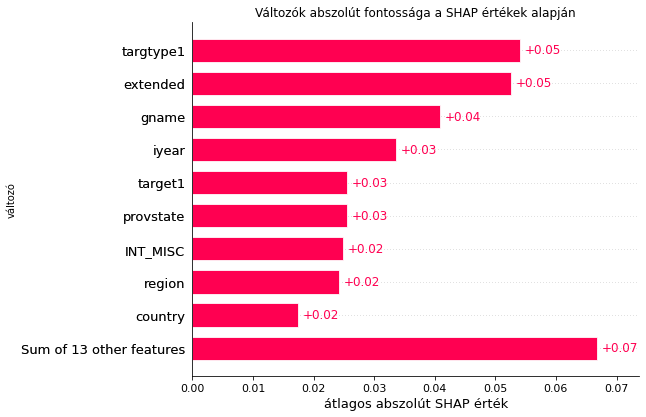

In [111]:
shap.plots.bar(shap_values_rf_ext[:, :, 1], show=False)
plt.title("Változók abszolút fontossága a SHAP értékek alapján")
plt.ylabel("változó")
plt.xlabel("átlagos abszolút SHAP érték")

Text(0.5, 0, 'SHAP érték')

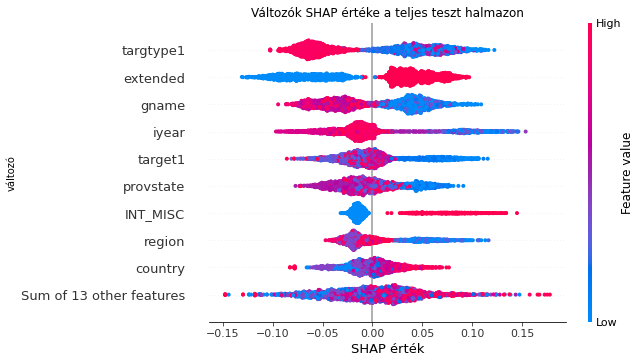

In [112]:
shap.plots.beeswarm(shap_values_rf_ext[:, :, 1], show=False)
plt.title("Változók SHAP értéke a teljes teszt halmazon")
plt.ylabel("változó")
plt.xlabel("SHAP érték")

In [113]:
## SHAP értékek megállapítása a lokális fontosságok ábrázolásához
explainer_rf_ext = shap.TreeExplainer(best_rf_ext)
shap_values_rf_ext = explainer_rf_ext.shap_values(X_test_ext)

Text(0.5, 1.4, 'A döntést befolyásoló tényezők egy "pozitívnak" prediktált esetben')

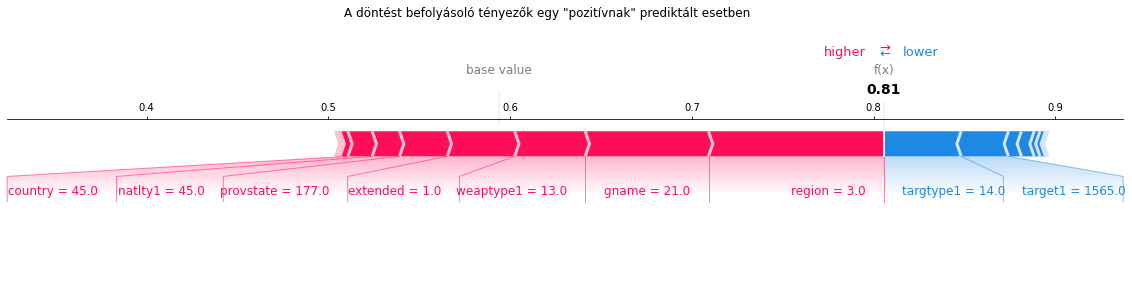

In [114]:
shap.force_plot(explainer_rf_ext.expected_value[1], shap_values_rf_ext[1][0], X_test_ext.iloc[0], matplotlib=True, show=False)
plt.suptitle("A döntést befolyásoló tényezők egy \"pozitívnak\" prediktált esetben", y=1.4)

Főbb negatív hatások:


*   támadás típusa: 14 - konkrét személy elleni támadás/nyilvánosság ellen és/vagy nyilvános területen elkövetett támadás
*   támadás célpontja (konkrét ember vagy épület/helyszín): 1565 - Civilians

Főbb pozitív hatások:


*   régió: 3 - Dél Amerika
*   szervezet: 21 - National Liberation Army of Colombia (ELN)

Text(0.5, 1.4, 'A döntést befolyásoló tényezők egy "negatívnak" prediktált esetben')

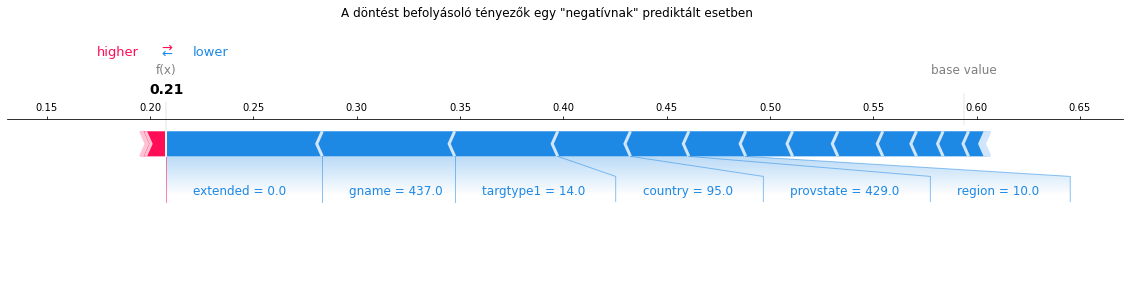

In [115]:
shap.force_plot(explainer_rf_ext.expected_value[1], shap_values_rf_ext[1][7], X_test_ext.iloc[7], matplotlib=True, show=False)
plt.suptitle("A döntést befolyásoló tényezők egy \"negatívnak\" prediktált esetben", y=1.4)

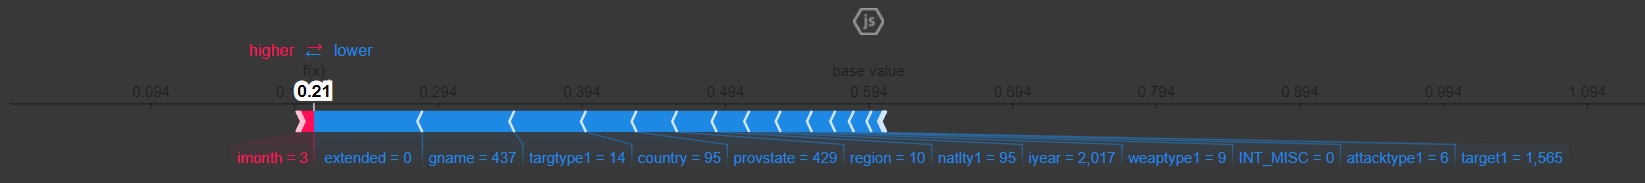

Főbb pozitív hatás:


*   imonth = 3 --> márciusban történt a támadás

Főbb negatív hatások:


*   extended = 0 --> nem tartott 24 óránál tovább
*   gname = 437 --> szervezet: Islamic State of Iraq and the Levant (ISIL)
*   targtype1 = 14 --> támadás típusa: konkrét személy elleni támadás/nyilvánosság ellen és/vagy nyilvános területen elkövetett támadás

#### Kódolt változók jelentésének visszakeresése (a fenti esetekre):

In [125]:
label_gname[437]

'Islamic State of Iraq and the Levant (ISIL)'

In [128]:
label_gname[21]

'National Liberation Army of Colombia (ELN)'

In [126]:
label_target1[1565]

'Civilians'